In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

/root/miniconda3/envs/paul/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(10, 10000, 12544)
(100000, 12544)


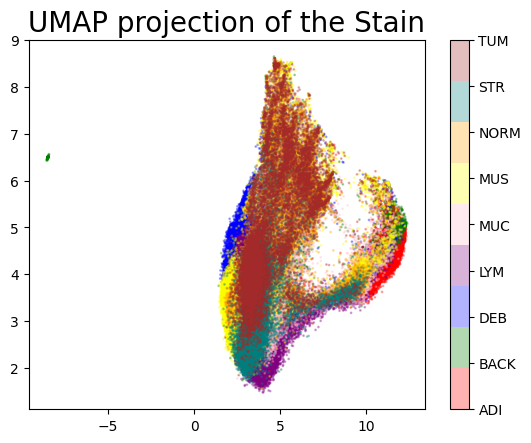

In [2]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Grayscale(num_output_channels=1)

])

test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/result/1/stain',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])

# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=10000, shuffle=False, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
element = 112*112
targets=[]
for data_batch,target in dataloader:
    data_list.append(torch.reshape(data_batch,(data_batch.shape[0],element)).numpy())
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=10).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the Stain',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys())
plt.savefig('./umap/stain_umap.png')


(10, 10000, 12544)
(100000, 12544)


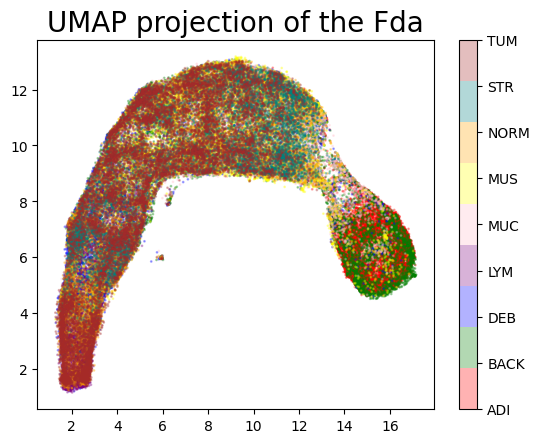

In [3]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Grayscale(num_output_channels=1)

])

test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/result/1/fda',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])

# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=10000, shuffle=False, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
element = 112*112
targets=[]
for data_batch,target in dataloader:
    data_list.append(torch.reshape(data_batch,(data_batch.shape[0],element)).numpy())
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=10).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the Fda',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys())
plt.savefig('./umap/fda_umap.png')


(10, 10000, 12544)
(100000, 12544)


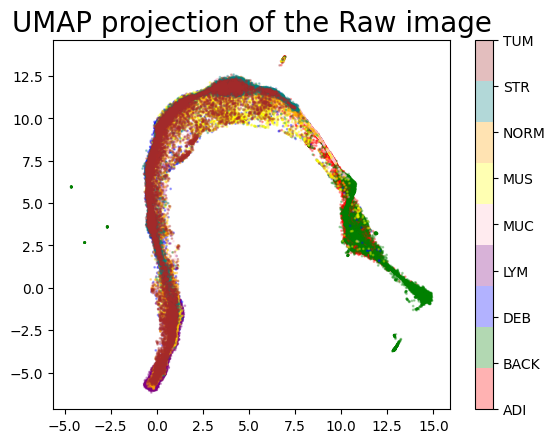

In [4]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Grayscale(num_output_channels=1)
])

test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/NCT-CRC-HE-100K-NONORM',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])

# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=10000, shuffle=False, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
element = 112*112
targets=[]
for data_batch,target in dataloader:
    data_list.append(torch.reshape(data_batch,(data_batch.shape[0],element)).numpy())
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=10).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the Raw image',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys())
plt.savefig('./umap/raw_umap.png')
